# Este es el segundo notebook
regresar al de clustering en caso de no haberlo visto aún

# 3. Analisis de componentes principales.

- **3.1** *Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?*

   Las columnas categóricas en esta base de datos son: `genres`, `productionCompany`, `productionCompanyCountry`, `producitonCountry`, `originalLanguage`, `director` y `actors`. 

   Entre las transformaciones que pueden haber para las variables categorias esta la `One-Hot Encoding` que es practicamente convertirlas en binarias, sin embargo ninguna de estas variables categoricas se reducen a dos opciones, por lo que que esta transformacion no nos es util.

   Tambien tenemos la `Codificacion de frecuencia`, que se refiere a reemplazar cada categoria con una frecuencia de aparicion, sin embargo tampoco nos es relevante y no vale la pena realizar esta transformacion.

   En conclusion, no vale la pena hacer transformaciones para las variables categoricas, por mas que si sea posible hacerlas.

- **3.2** *Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que
puede usar el índice KMO y el test de esfericidad de Bartlett.*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo, FactorAnalyzer
from scipy.stats import bartlett
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./movies.csv', encoding="ISO-8859-1")


numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

In [13]:
numDF = df[numeric_columns]
print(numDF.head())

   id    budget      revenue  runtime  popularity  voteAvg  voteCount  \
0   5   4000000    4257354.0       98      20.880      5.7       2077   
1   6  21000000   12136938.0      110       9.596      6.5        223   
2  11  11000000  775398007.0      121     100.003      8.2      16598   
3  12  94000000  940335536.0      100     134.435      7.8      15928   
4  13  55000000  677387716.0      142      58.751      8.5      22045   

   genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  
0             2                   2                          1            25  
1             3                   3                          2            15  
2             3                   2                          1           105  
3             2                   1                          1            24  
4             3                   2                          1            76  


In [11]:
numDF = numDF.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
print(numDF.head())


   id    budget      revenue  runtime  popularity  voteAvg  voteCount  \
0   5   4000000    4257354.0       98      20.880      5.7       2077   
1   6  21000000   12136938.0      110       9.596      6.5        223   
2  11  11000000  775398007.0      121     100.003      8.2      16598   
3  12  94000000  940335536.0      100     134.435      7.8      15928   
4  13  55000000  677387716.0      142      58.751      8.5      22045   

   genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  
0             2                   2                          1            25  
1             3                   3                          2            15  
2             3                   2                          1           105  
3             2                   1                          1            24  
4             3                   2                          1            76  


C:\Users\pablo\AppData\Local\Temp\ipykernel_9528\3068157745.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numDF = numDF.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


In [16]:
scaler = StandardScaler()
numDF_scaled = scaler.fit_transform(numDF)

In [ ]:
# KMO's Test
kmo, model = calculate_kmo(numDF)

# Bartlett's Test
xi2, p = bartlett(*numDF.T.values)

print(f'Indice KMO: {model:.3f}')
print(f"Prueba de Bartlett - xi2: {xi2:.3f}, p-value: {p:.5f}")

if model > 0.8 and p < 0.05:
    conclusion = "PCA es altamente recomendable, los datos tienen una fuerte correlación."
elif 0.7 <= model <= 0.8 and p < 0.05:
    conclusion = "PCA es una buena opción, aunque no óptima."
elif 0.6 <= model < 0.7 and p < 0.05:
    conclusion = "PCA puede aplicarse, pero la relación entre variables no es muy fuerte."
elif model < 0.6 or p > 0.05:
    conclusion = "PCA no es recomendable, las variables no están lo suficientemente correlacionadas."

print(f"\nConclusión:", conclusion)

Indice KMO: 0.713
Prueba de Bartlett - xi2: 2324724.780, p-value: 0.00000

Conclusión: ✅ PCA es una buena opción, aunque no óptima.


- **3.3** Haga un análisis de componentes principales con las variables numéricas, discuta los
resultados e interprete los componentes.

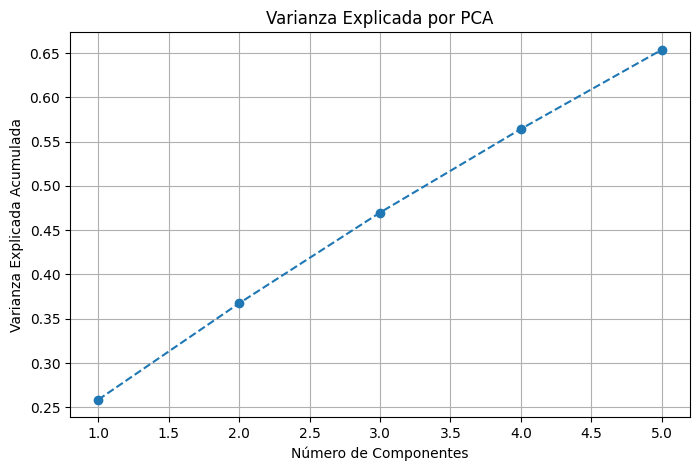

In [24]:
pca = PCA(n_components=5)
comp = pca.fit(numDF_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por PCA")
plt.grid()
plt.show()

El gráfico muestra que la varianza explicada se distribuye de manera bastante uniforme entre los cinco primeros componentes, sin un "codo" claro que nos indique un número óptimo de componentes. Esto significa que no hay un pequeño conjunto de componentes que capture la mayor parte de la información del dataset, lo que sugiere que reducir dimensiones con PCA podría no ser tan efectivo en este caso. Aun así, los primeros tres o cuatro componentes explican una parte considerable de la variabilidad en los datos, por lo que podrían usarse para simplificar la información sin perder demasiado detalle.

In [25]:
pca_df = pd.DataFrame(pca.components_, columns=numDF.columns, index=[f"PC{i+1}" for i in range(5)])
print("Matriz de Componentes Principales:")
print(pca_df)

Matriz de Componentes Principales:
           id    budget   revenue   runtime  popularity   voteAvg  voteCount  \
PC1 -0.225102  0.501921  0.519759  0.285925    0.119149  0.172720   0.508017   
PC2  0.538927  0.102307  0.197044 -0.298472    0.557324  0.017949   0.112183   
PC3  0.327944 -0.132510 -0.092215  0.382328    0.240977  0.394636  -0.006707   
PC4 -0.034531 -0.228901 -0.118449  0.183264   -0.020290  0.717354   0.017973   
PC5  0.085539 -0.043718 -0.161717 -0.067952    0.367096  0.079233  -0.175792   

     genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  
PC1      0.160785            0.115109                  -0.041302     -0.050841  
PC2     -0.142039           -0.277156                  -0.020352      0.387630  
PC3     -0.327441            0.363503                   0.434436     -0.279779  
PC4      0.067058           -0.379278                  -0.484050      0.028472  
PC5      0.741038            0.467387                  -0.137260      0.040415 

Al analizar la matriz de componentes principales, vemos que cada componente agrupa diferentes variables con pesos importantes. El primer componente está fuertemente influenciado por el presupuesto, los ingresos y la cantidad de votos, lo que lo relaciona con el éxito financiero de las películas. El segundo componente refleja más la popularidad en la base de datos. Los siguientes componentes capturan otros aspectos como la duración, la cantidad de países involucrados en la producción y la calidad percibida por los usuarios. Esto sugiere que, aunque PCA no reduce la información de manera muy compacta, sí nos permite identificar distintos factores clave que influyen en las películas.






# Ir al notebook de Apriori